In [72]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import os

warnings.filterwarnings("ignore")

### Reading the dataset

In [73]:
# Reading the sample data set
used_cars_data = pd.read_csv("used_cars_data.csv")

### Observe the dataset

In [74]:
used_cars_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [75]:
used_cars_data.shape

(7253, 14)

In [76]:
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## Data Cleaning

### Handling Duplicates

In [77]:
used_cars_data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [78]:
# dropping duplicates
used_cars_data = used_cars_data.drop_duplicates()

In [79]:
used_cars_data.shape

(7253, 14)

### Handling Missing Values

In [80]:
# Checking and updating for missing values using isnull(), isna(), dropna() and fillna()

# check which column has how many NA cells
used_cars_data.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [81]:
# checking what percentage of data is missing
(used_cars_data.isna().sum() / len(used_cars_data)) * 100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [82]:
# we have two ways for handling missing values
# 1. Drop the columns with missing values
# 2. Fill the missing values with some values

In [83]:
# since, we have around 87% of missing values in New_Price column, we can drop the column

### Data Reduction

In [84]:
used_cars_data = used_cars_data.drop(["S.No.", "New_Price"], axis=1)

In [85]:
used_cars_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

In [86]:
#  checking the details of engine column
used_cars_data["Engine"]

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [87]:
# since, column Engine, Milage and Power have low missing values, we can drop the rows with missing values
# using subset parameter in dropna()

used_cars_data = used_cars_data.dropna(subset=["Engine", "Mileage", "Power"])

In [88]:
used_cars_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   7
Price                1224
dtype: int64

In [89]:
# first checking the values of min, max, median. so we can fill the missing values with them or not for Seats column
used_cars_data["Seats"].min()

np.float64(0.0)

In [90]:
used_cars_data["Seats"].max()

np.float64(10.0)

In [91]:
used_cars_data["Seats"].median()

np.float64(5.0)

In [92]:
# now, replacing Seats column with median value as there are only 7 missing values
used_cars_data["Seats"].fillna(
    used_cars_data["Seats"].median(), inplace=True
)  # inplace=True will update the original data

In [93]:
used_cars_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1224
dtype: int64

In [94]:
# now replacing the missing values in Price column with mean value
used_cars_data["Price"].fillna(used_cars_data["Price"].mean(), inplace=True)

In [95]:
used_cars_data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [96]:
used_cars_data.shape

(7205, 12)

### Explore Outliers

In [97]:
used_cars_data['Kilometers_Driven']
Q1 = used_cars_data['Kilometers_Driven'].quantile(0.25)

In [98]:
Q1

np.float64(34000.0)

In [99]:
Q3 = used_cars_data['Kilometers_Driven'].quantile(0.75)

In [100]:
Q3

np.float64(73000.0)

In [101]:
IQR = Q3 - Q1
IQR

np.float64(39000.0)

In [102]:
# outliers
outliers = used_cars_data[(used_cars_data['Kilometers_Driven'] < Q1 - 1.5 * IQR) | (used_cars_data['Kilometers_Driven'] > Q3 + 1.5 * IQR)]

In [103]:
outliers

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,4.000000
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.0 kmpl,1396 CC,69 bhp,5.0,2.500000
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,4.500000
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2012,136997,Diesel,Automatic,First,17.2 kmpl,1968 CC,138.1 bhp,5.0,8.500000
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,4.420000
...,...,...,...,...,...,...,...,...,...,...,...,...
7183,Hyundai Verna CRDi SX,Hyderabad,2009,137711,Diesel,Manual,First,16.8 kmpl,1493 CC,110 bhp,5.0,9.495133
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.8 kmpl,2993 CC,241.6 bhp,7.0,9.495133
7200,Maruti Ritz LDi,Pune,2015,190000,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0,9.495133
7213,Tata Indica Vista Quadrajet LS,Hyderabad,2013,170000,Diesel,Manual,First,22.3 kmpl,1248 CC,74 bhp,5.0,9.495133


### Handling data types

In [104]:
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7205 non-null   object 
 1   Location           7205 non-null   object 
 2   Year               7205 non-null   int64  
 3   Kilometers_Driven  7205 non-null   int64  
 4   Fuel_Type          7205 non-null   object 
 5   Transmission       7205 non-null   object 
 6   Owner_Type         7205 non-null   object 
 7   Mileage            7205 non-null   object 
 8   Engine             7205 non-null   object 
 9   Power              7205 non-null   object 
 10  Seats              7205 non-null   float64
 11  Price              7205 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 731.8+ KB


In [105]:
used_cars_data['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7205, dtype: object

In [106]:
used_cars_data['Transmission']

0          Manual
1          Manual
2          Manual
3          Manual
4       Automatic
          ...    
7248       Manual
7249    Automatic
7250       Manual
7251    Automatic
7252    Automatic
Name: Transmission, Length: 7205, dtype: object

In [107]:
used_cars_data['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
7248    5.0
7249    5.0
7250    5.0
7251    5.0
7252    5.0
Name: Seats, Length: 7205, dtype: float64

In [108]:
# Here, we can see that Seats column is of float type, but it should be of int type

used_cars_data["Seats"] = used_cars_data["Seats"].astype(int)

In [109]:
used_cars_data['Seats']

0       5
1       5
2       5
3       7
4       5
       ..
7248    5
7249    5
7250    5
7251    5
7252    5
Name: Seats, Length: 7205, dtype: int64

In [110]:
# for column with date
# used_cars_data[datetime_column] = pd.to_datetime(used_cars_data[datetime_column])

### Creating Features

In [111]:
used_cars_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


### Creating New Features

In [112]:
# For cars, we can create a car age column from Year column
from datetime import date

# print(date.today().year)

used_cars_data["Car_Age"] = date.today().year - used_cars_data["Year"]

In [113]:
used_cars_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.750000,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.500000,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.500000,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.000000,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.740000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5,9.495133,14
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5,9.495133,10
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,9.495133,13
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5,9.495133,12


In [114]:
used_cars_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74,12


In [115]:
used_cars_data['Brand'] = used_cars_data.Name.str.split().str.get(0)

In [116]:
used_cars_data['Brand']

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand, Length: 7205, dtype: object

In [117]:
used_cars_data['Model'] = used_cars_data.Name.str.split().str.get(1) + " " + used_cars_data.Name.str.split().str.get(2)

In [118]:
used_cars_data['Model']

0                 Wagon R
1               Creta 1.6
2                  Jazz V
3              Ertiga VDI
4                  A4 New
              ...        
7248         Vento Diesel
7249              Polo GT
7250         Micra Diesel
7251              Polo GT
7252    E-Class 2009-2013
Name: Model, Length: 7205, dtype: object

In [119]:
used_cars_data[['Name', 'Brand', 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT


In [120]:
used_cars_data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [121]:

# replacing ISUZU with Isuzu, Mini with Mini Cooper, Land with Land Rover

used_cars_data['Brand'].replace({'ISUZU': 'Isuzu', 'Mini': 'Mini Cooper', 'Land' : 'Land Rover'}, inplace=True)

In [122]:
used_cars_data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

## Data Exploration

### Descriptive Statistics

In [123]:
used_cars_data.describe()

,Year,Kilometers_Driven,Seats,Price,Car_Age
count,7205.000000,7.205000e+03,7205.000000,7205.000000,7205.000000
mean,2013.388758,5.863672e+04,5.279528,9.495133,11.611242
std,3.237501,8.466067e+04,0.811411,10.206238,3.237501
min,1996.000000,1.710000e+02,0.000000,0.440000,6.000000
25%,2011.000000,3.400000e+04,5.000000,3.870000,9.000000
50%,2014.000000,5.328000e+04,5.000000,6.750000,11.000000
75%,2016.000000,7.300000e+04,5.000000,9.495133,14.000000
max,2019.000000,6.500000e+06,10.000000,160.000000,29.000000


In [124]:
used_cars_data['Price']

0        1.750000
1       12.500000
2        4.500000
3        6.000000
4       17.740000
          ...    
7248     9.495133
7249     9.495133
7250     9.495133
7251     9.495133
7252     9.495133
Name: Price, Length: 7205, dtype: float64

In [125]:
# Assignment: From descriptive statistics, explore and summarize what you have found in terms of words.

In [126]:
used_cars_data[used_cars_data['Brand'] == 'Honda'].describe()

,Year,Kilometers_Driven,Seats,Price,Car_Age
count,737.000000,737.000000,737.000000,737.000000,737.000000
mean,2013.103121,55166.902307,5.100407,6.170343,11.896879
std,3.248780,32150.167432,0.437026,2.772843,3.248780
min,1999.000000,1015.000000,5.000000,0.900000,6.000000
25%,2011.000000,35676.000000,5.000000,3.900000,10.000000
50%,2014.000000,51637.000000,5.000000,5.670000,11.000000
75%,2015.000000,70000.000000,5.000000,9.270000,14.000000
max,2019.000000,480000.000000,7.000000,17.500000,26.000000


In [127]:
used_cars_data[used_cars_data['Brand'] == 'Honda']['Model'].unique()

array(['Jazz V', 'City 1.5', 'Amaze S', 'City Corporate', 'WRV i-VTEC',
       'City ZX', 'Brio VX', 'Amaze SX', 'City i', 'Civic 2006-2010',
       'CR-V 2.4', 'Jazz 1.2', 'Brio S', 'Brio V', 'Amaze VX',
       'City i-VTEC', 'Jazz VX', 'Brio 1.2', 'Accord 2.4', 'CR-V RVi',
       'BRV i-VTEC', 'BR-V i-VTEC', 'CR-V 2.4L', 'Mobilio S', 'Jazz 1.5',
       'City V', 'BR-V i-DTEC', 'Amaze EX', 'City 1.3', 'CR-V 2.0L',
       'Mobilio RS', 'Civic 2010-2013', 'Accord VTi-L', 'Mobilio V',
       'Amaze V', 'Amaze E', 'City i-DTEC', 'Accord 2001-2003',
       'Mobilio E', 'Brio E', 'Jazz Select', 'CR-V 2.0', 'Brio EX',
       'CR-V Sport', 'Jazz Exclusive', 'Accord V6', 'Jazz Mode',
       'Jazz Active', 'Jazz S', 'WR-V Edge', 'CR-V Petrol', 'BRV i-DTEC',
       'CR-V Diesel', 'WRV i-DTEC', 'Jazz 2020'], dtype=object)

In [128]:
used_cars_data[used_cars_data['Model'] == 'Jazz V'].describe()

,Year,Kilometers_Driven,Seats,Price,Car_Age
count,6.000000,6.00000,6.0,6.000000,6.000000
mean,2015.166667,33721.50000,5.0,6.283333,9.833333
std,2.228602,9229.87241,0.0,0.997330,2.228602
min,2011.000000,17978.00000,5.0,4.500000,8.000000
25%,2015.000000,31783.50000,5.0,6.000000,8.250000
50%,2015.500000,34986.50000,5.0,6.550000,9.500000
75%,2016.750000,36993.25000,5.0,6.912500,10.000000
max,2017.000000,46000.00000,5.0,7.250000,14.000000


### Univariate analysis

In [129]:
categorical_columns = used_cars_data.select_dtypes(include = 'object').columns
categorical_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Brand', 'Model'],
      dtype='object')

In [130]:
numerical_columns = used_cars_data.select_dtypes(include = np.number).columns
numerical_columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age'], dtype='object')

In [131]:
# numerical_columns is already a list, no need to convert it
numerical_columns = numerical_columns

In [132]:
numerical_columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age'], dtype='object')

Year


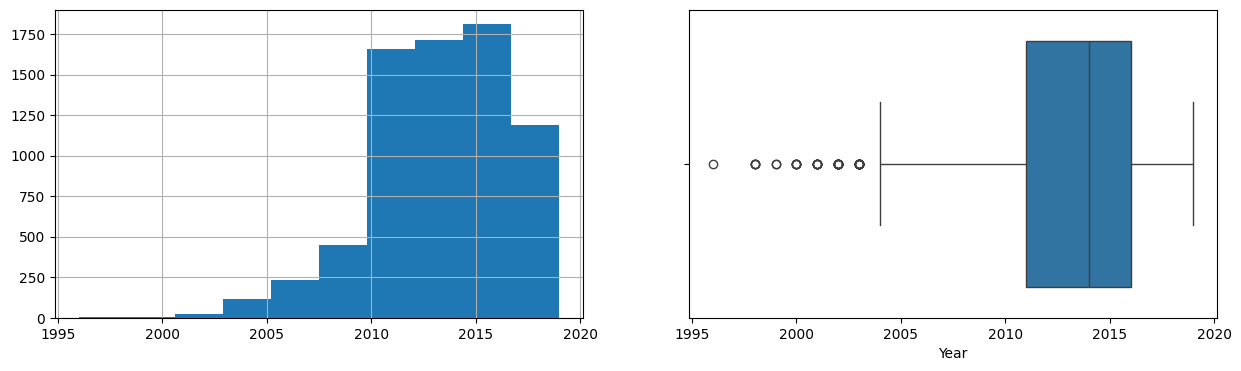

Kilometers_Driven


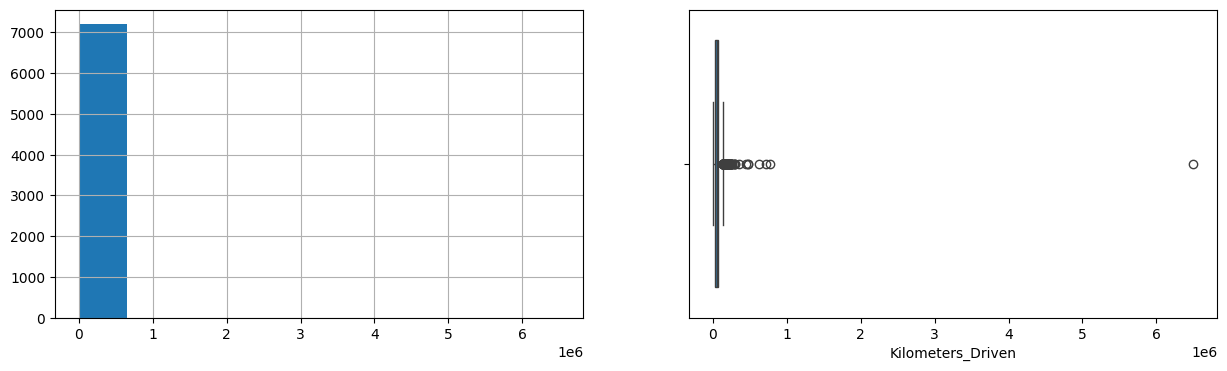

Seats


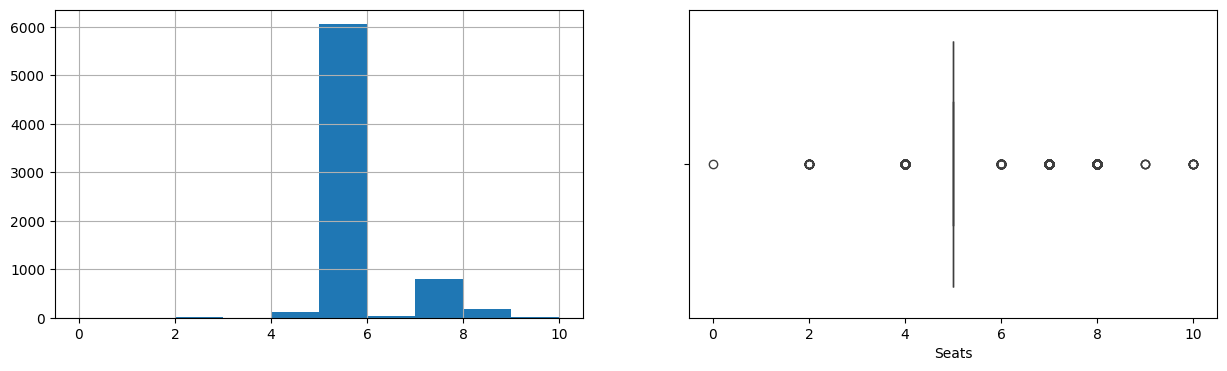

Price


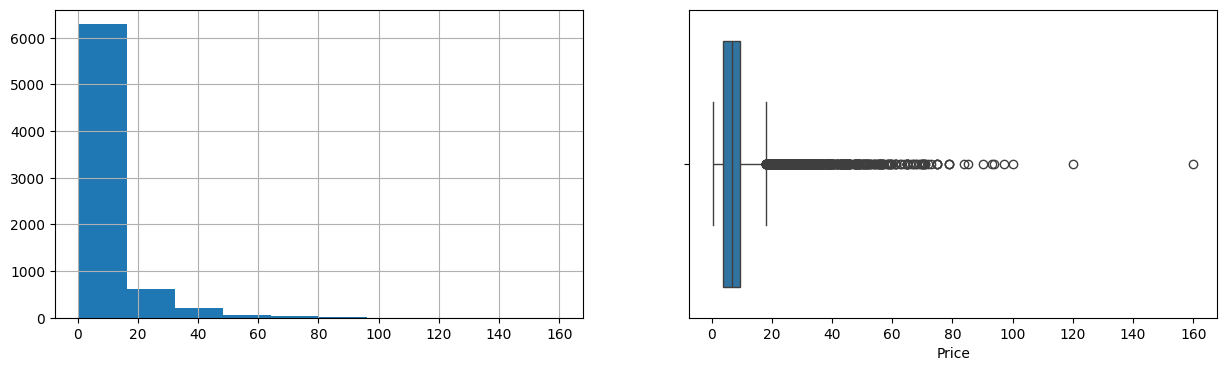

Car_Age


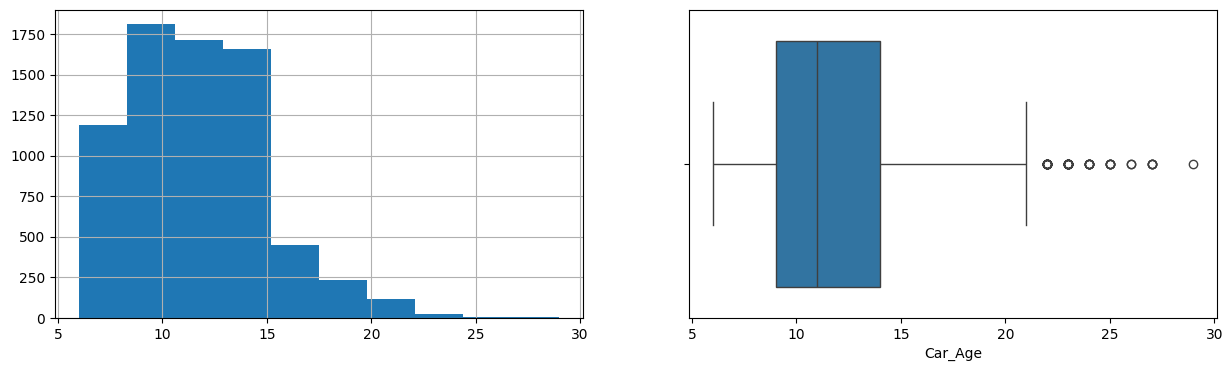

In [133]:
# univariate analysis of num_cols

for col in numerical_columns:
    print(col)
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    used_cars_data[col].hist()
    plt.subplot(1, 2, 2)
    sns.boxplot(x = used_cars_data[col])
    plt.show()

<Axes: xlabel='Location', ylabel='count'>

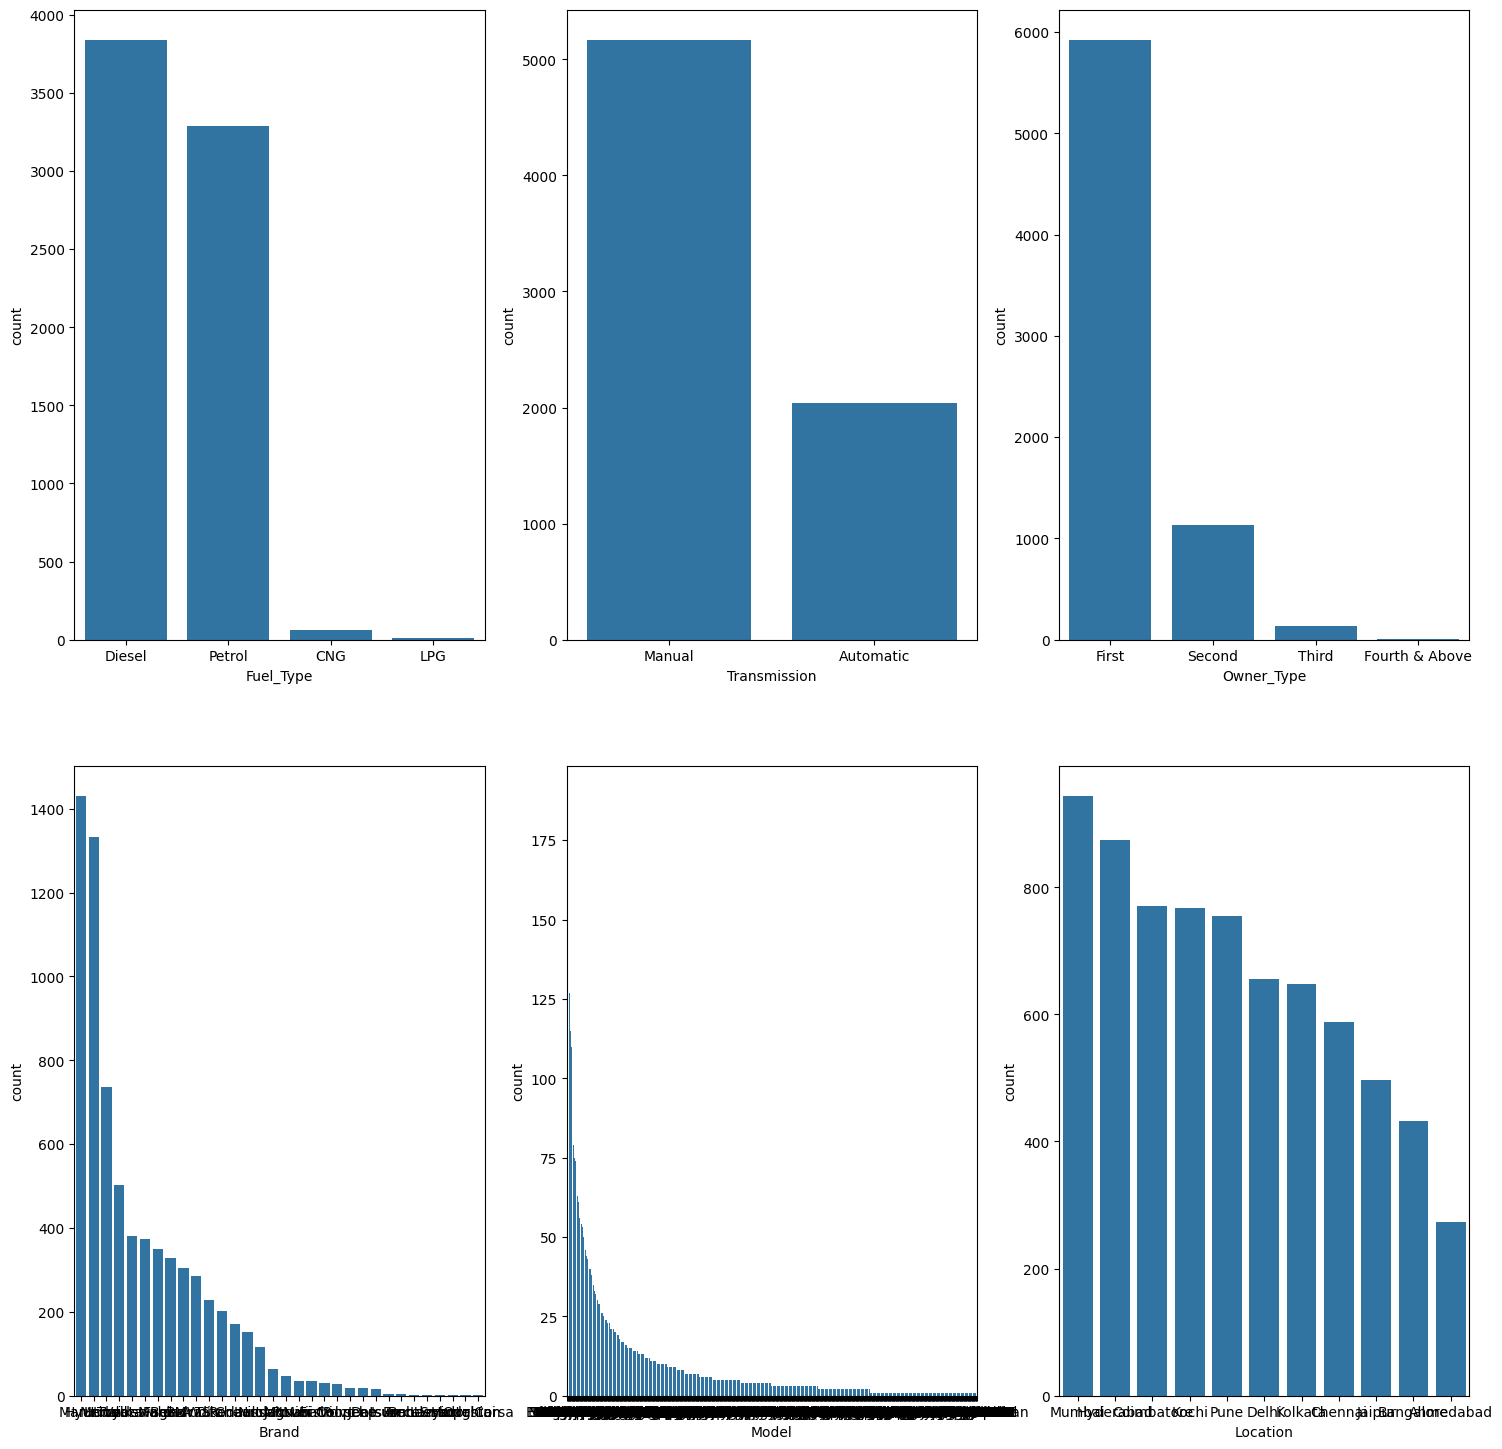

In [134]:
# categorical variables

fig, axes = plt.subplots(2, 3, figsize=(18, 18))
sns.countplot(ax=axes[0, 0], x='Fuel_Type', data=used_cars_data, order=used_cars_data['Fuel_Type'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='Transmission', data=used_cars_data, order=used_cars_data['Transmission'].value_counts().index)
sns.countplot(ax=axes[0, 2], x='Owner_Type', data=used_cars_data, order=used_cars_data['Owner_Type'].value_counts().index)
sns.countplot(ax=axes[1, 0], x='Brand', data=used_cars_data, order=used_cars_data['Brand'].value_counts().index)
sns.countplot(ax=axes[1, 1], x='Model', data=used_cars_data, order=used_cars_data['Model'].value_counts().index)
sns.countplot(ax=axes[1, 2], x='Location', data=used_cars_data, order=used_cars_data['Location'].value_counts().index)

In [135]:
# log transformation of feature Kilometers_Driven

used_cars_data['Kilometers_Driven_Log'] = np.log1p(used_cars_data['Kilometers_Driven'])
used_cars_data['Kilometers_Driven_Log']


0       11.184435
1       10.621352
2       10.736418
3       11.373675
4       10.613271
          ...    
7248    11.401010
7249    10.985310
7250    10.239996
7251    10.864044
7252    11.190569
Name: Kilometers_Driven_Log, Length: 7205, dtype: float64

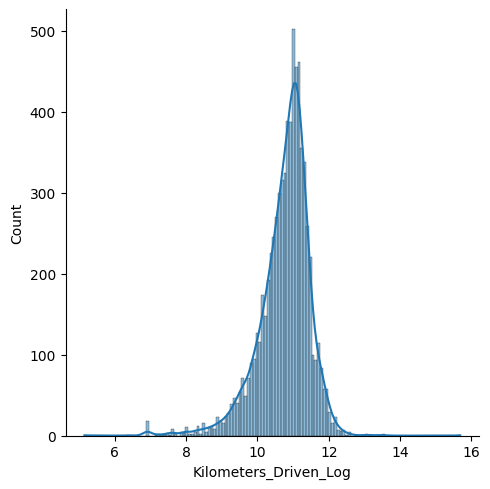

In [136]:
sns.displot(used_cars_data['Kilometers_Driven_Log'], kde=True)

<Figure size 1300x1700 with 0 Axes>

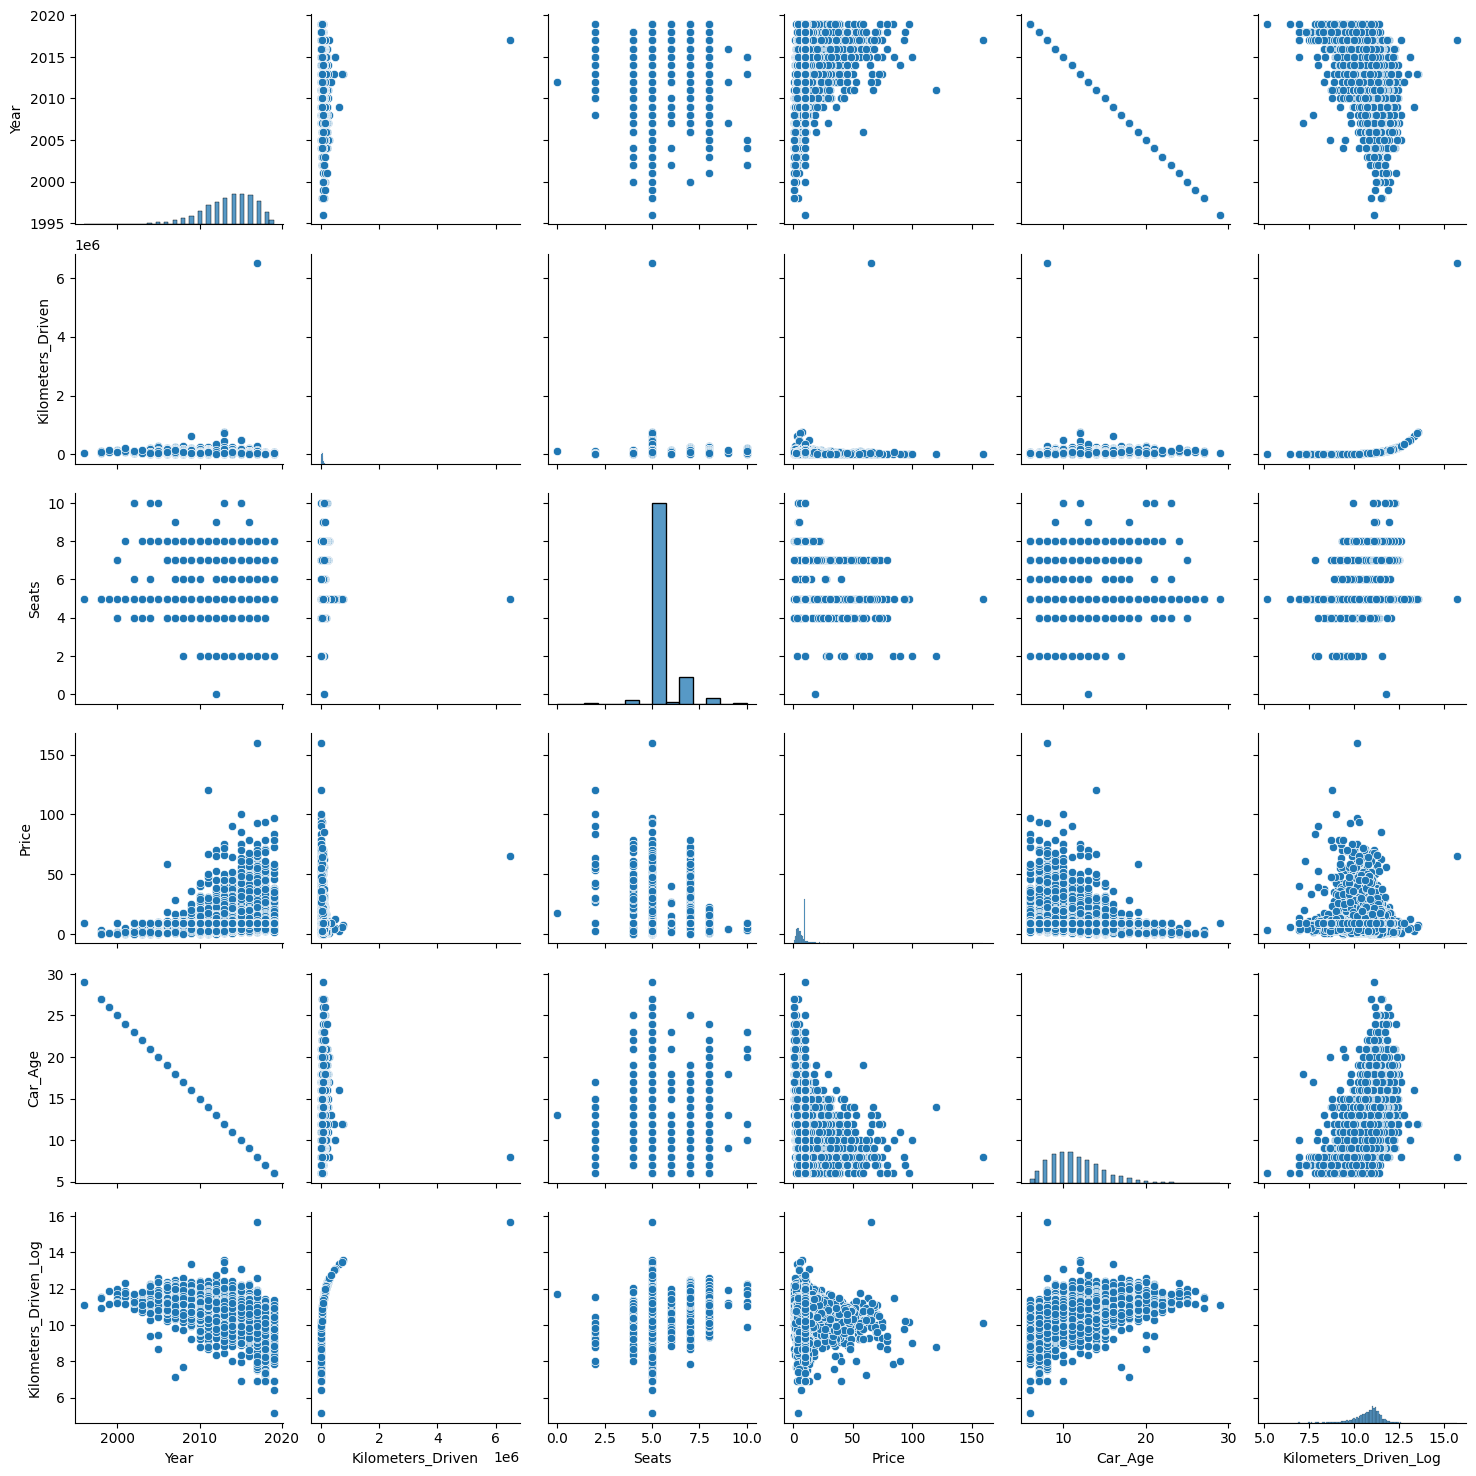

In [137]:
# bivariate analysis

plt.figure(figsize=(13, 17))
# sns.pairplot(data = used_cars_data.drop(['Kilometers_Driven', 'Price'], axis=1), kind='scatter', diag_kind='kde')
sns.pairplot(data = used_cars_data)

<Axes: xlabel='Brand'>

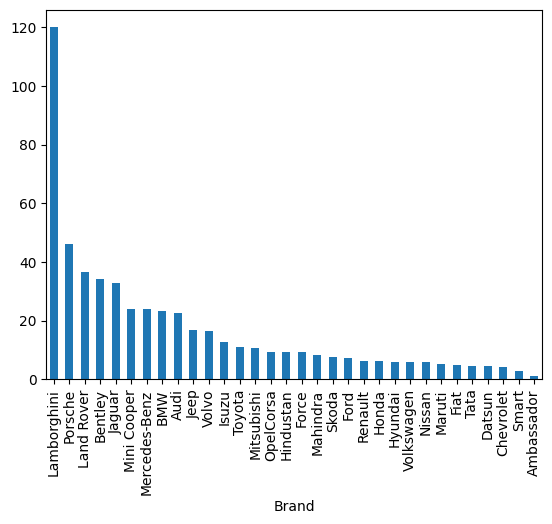

In [138]:
# Relationship between categorical variables (Brand), continuous variables (Price)

used_cars_data.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot.bar()

<Axes: >

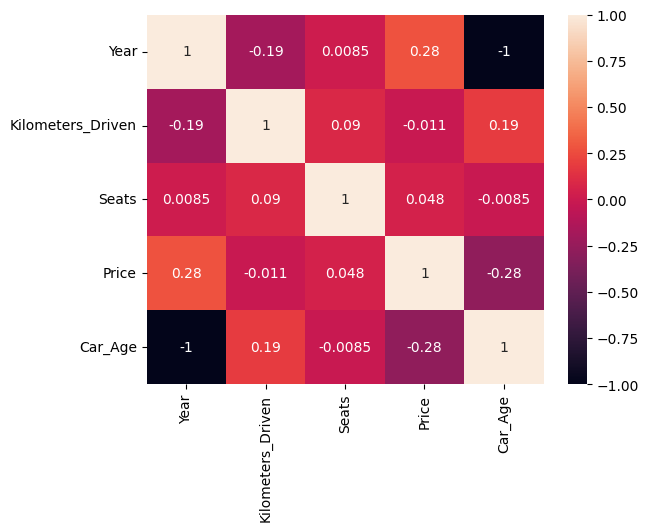

In [139]:
# Selecting only numeric columns for correlation matrix
# numeric_data = used_cars_data.select_dtypes(include=[np.number])
# sns.heatmap(numeric_data.corr(), annot=True)
# this 👆 above is also a way to select numeric columns and generating headmap

# Selecting only numeric columns for correlation matrix
corr_matrix = used_cars_data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True)